This is a demo notebook for the baseline VQA method of always answering **yes** to an image/question pair.

In [1]:
# Add the path of the main directory
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [3]:
from prior_yes import PriorYes
from evaluate import Evaluate

In [4]:
%load_ext autoreload

%autoreload 2

In [5]:
dataDir     = r"C:\Users\Nasser Benab\Documents\git\data\vqa"
versionType = "" 
taskType    = "OpenEnded" 
dataType    = "mscoco"

In [9]:
# per Q-type prior method
pr_yes = PriorYes(dataDir, versionType, taskType, dataType)

# Predictions 

In [11]:
# Predict answers on the validation dataset
dataSubType = "val2014"
pr_yes.predict(dataSubType)

loading VQA annotations and questions into memory...
0:00:07.590000
creating index...
index created!
--> Saving the results


# Evaluation 

In [12]:
# Compute the accuracies for the validation set
eval_ = Evaluate(pr_yes.vqa_test, pr_yes.results_file, pr_yes.quesFile_test, 
                 pr_yes.dataDir, pr_yes.dataType, dataSubType)
eval_.compute_accuracies()

Loading and preparing results...     
DONE (t=0.77s)
creating index...
index created!
computing accuracy
Finshed Percent: [####################] 99% Done computing accuracy


Overall Accuracy: 27.38%


In [13]:
# Accuracy per answer type (%)
eval_.acc_answer_type_df

,Answer type,Accuracy
0,yes/no,71.17
1,other,1.38
2,number,0.38


In [14]:
# Accuracy per question type (%)
eval_.acc_question_type_df.head()

,Question type,Accuracy
0,could,89.91
1,is there a,88.23
2,are there,82.13
3,is there,80.95
4,do you,78.64


Ground truth answers:
---------------------
Question: Could the main skier be someone's father?
Answer 1: yes
Answer 2: no
Answer 3: yes
Answer 4: no
Answer 5: no
Answer 6: yes
Answer 7: no
Answer 8: yes
Answer 9: no
Answer 10: no


Generated answer (accuracy 100.0%):
---------------------------------
Answer: yes


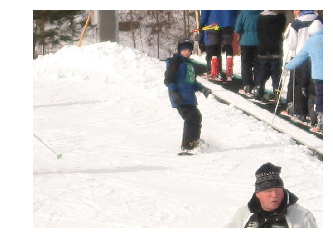

In [15]:
# Retrieve particular results
eval_.retrieve_result(question_type="could")